<a href="https://colab.research.google.com/github/gopal2812/convandgpt/blob/main/Submission/Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /content/convandgpt/
!git clone https://github.com/gopal2812/convandgpt.git
import os

Cloning into 'convandgpt'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 54 (delta 23), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (54/54), 194.34 KiB | 8.45 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [2]:
os.chdir("/content/convandgpt/Submission7")

In [3]:
!pwd;ls

/content/convandgpt/Submission7
model.py  utils.py


In [4]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from utils import train, test
import torch.nn.functional as F
from model import Model_1

!pip install torchsummary
from torchsummary import summary


In [5]:
# Set Seed for reproducibility
SEED = 1
torch.manual_seed(SEED)
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
model = Model_1().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 20, 26, 26]             200
              ReLU-2           [-1, 20, 26, 26]               0
       BatchNorm2d-3           [-1, 20, 26, 26]              40
            Conv2d-4           [-1, 10, 24, 24]           1,810
              ReLU-5           [-1, 10, 24, 24]               0
       BatchNorm2d-6           [-1, 10, 24, 24]              20
            Conv2d-7           [-1, 11, 22, 22]           1,001
              ReLU-8           [-1, 11, 22, 22]               0
       BatchNorm2d-9           [-1, 11, 22, 22]              22
           Conv2d-10           [-1, 10, 11, 11]             120
             ReLU-11           [-1, 10, 11, 11]               0
      BatchNorm2d-12           [-1, 10, 11, 11]              20
           Conv2d-13             [-1, 10, 9, 9]             910
             ReLU-14             [-1, 1

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
batch_size = 64
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

# Train data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation((-12., 12.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

100%|██████████| 9912422/9912422 [00:00<00:00, 155087534.81it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30768527.77it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 165638191.19it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12087898.96it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



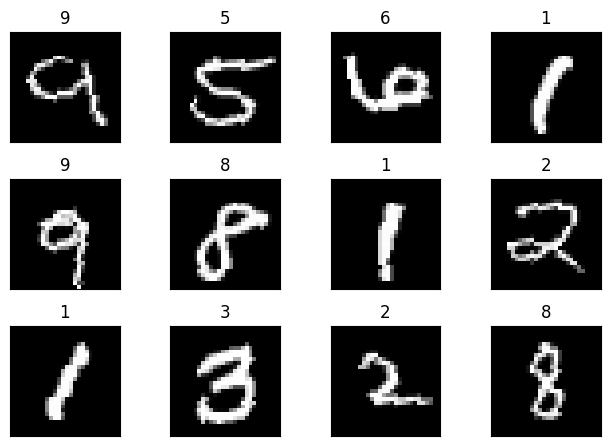

In [8]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))
fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [11]:
# New Line
num_epochs = 15
l1_factor=0
l2_factor=0
epochs = 15
from torch.optim.lr_scheduler import StepLR,OneCycleLR
optimizer = optim.SGD(model.parameters(), lr=0.025, momentum=0.97,weight_decay=l2_factor)
scheduler = OneCycleLR(optimizer, max_lr=0.025,epochs=epochs,steps_per_epoch=len(train_loader))

train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

for epoch in range(1, epochs + 1):
    print(f'Epoch {epoch}:')
    train(model, device, train_loader, optimizer, epoch, train_accuracy, train_losses, l1_factor,scheduler)
    test(model, device, test_loader,test_accuracy,test_losses)


Epoch 1:


Loss=0.1570202112197876 Batch_id=937 Accuracy=85.17: 100%|██████████| 938/938 [01:21<00:00, 11.56it/s]



Test set: Average loss: 0.1540, Accuracy: 9562/10000 (95.62%)

Epoch 2:


Loss=0.06927412003278732 Batch_id=937 Accuracy=96.91: 100%|██████████| 938/938 [01:24<00:00, 11.05it/s]



Test set: Average loss: 0.0913, Accuracy: 9718/10000 (97.18%)

Epoch 3:


Loss=0.016403542831540108 Batch_id=937 Accuracy=97.77: 100%|██████████| 938/938 [01:23<00:00, 11.21it/s]



Test set: Average loss: 0.0438, Accuracy: 9859/10000 (98.59%)

Epoch 4:


Loss=0.026528432965278625 Batch_id=937 Accuracy=98.20: 100%|██████████| 938/938 [01:22<00:00, 11.33it/s]



Test set: Average loss: 0.0544, Accuracy: 9819/10000 (98.19%)

Epoch 5:


Loss=0.009608907625079155 Batch_id=937 Accuracy=98.42: 100%|██████████| 938/938 [01:24<00:00, 11.04it/s]



Test set: Average loss: 0.0326, Accuracy: 9905/10000 (99.05%)

Epoch 6:


Loss=0.08736464381217957 Batch_id=937 Accuracy=98.55: 100%|██████████| 938/938 [01:22<00:00, 11.34it/s]



Test set: Average loss: 0.0339, Accuracy: 9900/10000 (99.00%)

Epoch 7:


Loss=0.06368274241685867 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [01:23<00:00, 11.23it/s]



Test set: Average loss: 0.0265, Accuracy: 9920/10000 (99.20%)

Epoch 8:


Loss=0.056786973029375076 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [01:22<00:00, 11.38it/s]



Test set: Average loss: 0.0268, Accuracy: 9920/10000 (99.20%)

Epoch 9:


Loss=0.11674189567565918 Batch_id=937 Accuracy=98.83: 100%|██████████| 938/938 [01:21<00:00, 11.48it/s]



Test set: Average loss: 0.0245, Accuracy: 9926/10000 (99.26%)

Epoch 10:


Loss=0.008690089918673038 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [01:24<00:00, 11.16it/s]



Test set: Average loss: 0.0230, Accuracy: 9927/10000 (99.27%)

Epoch 11:


Loss=0.011098488233983517 Batch_id=937 Accuracy=98.96: 100%|██████████| 938/938 [01:23<00:00, 11.30it/s]



Test set: Average loss: 0.0208, Accuracy: 9938/10000 (99.38%)

Epoch 12:


Loss=0.02812943607568741 Batch_id=937 Accuracy=99.07: 100%|██████████| 938/938 [01:23<00:00, 11.17it/s]



Test set: Average loss: 0.0189, Accuracy: 9939/10000 (99.39%)

Epoch 13:


Loss=0.0048796189948916435 Batch_id=937 Accuracy=99.22: 100%|██████████| 938/938 [01:22<00:00, 11.37it/s]



Test set: Average loss: 0.0176, Accuracy: 9940/10000 (99.40%)

Epoch 14:


Loss=0.0451086163520813 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [01:22<00:00, 11.40it/s]



Test set: Average loss: 0.0172, Accuracy: 9937/10000 (99.37%)

Epoch 15:


Loss=0.07724378257989883 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [01:23<00:00, 11.30it/s]



Test set: Average loss: 0.0174, Accuracy: 9941/10000 (99.41%)



## Model 1
#Target
Set up a model structure, borrowed from previous exercise
Basic code from the previous exercise
Get the set-up right
Set Transforms
Set Data Loader
Set Basic Working Code
Set Basic Training  & Test Loop



#Results
Train Acc: 99.3%

Test Acc: ~99.4% infrequent

Parameters: 7369

#Analysis
We have got the basic skelton and compact model.The model is over-fitting. we need our transform seems to be doing a good job making the training hard.
Let's see what the model can do with the least parameters setup.
